<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Hands-on Lab: Complete the EDA with Visualization


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


Install the below libraries


In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [2]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


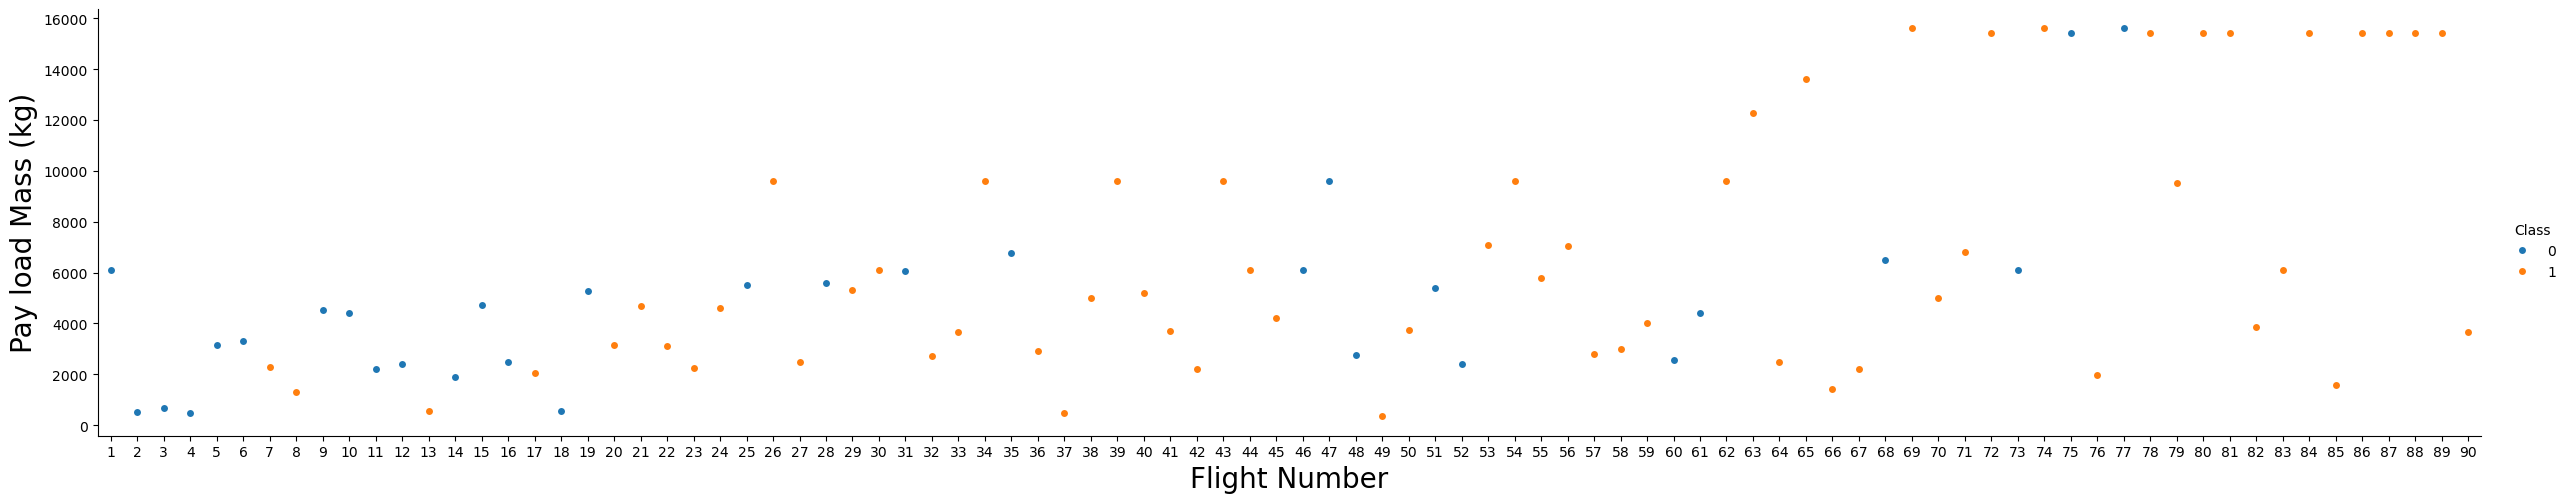

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


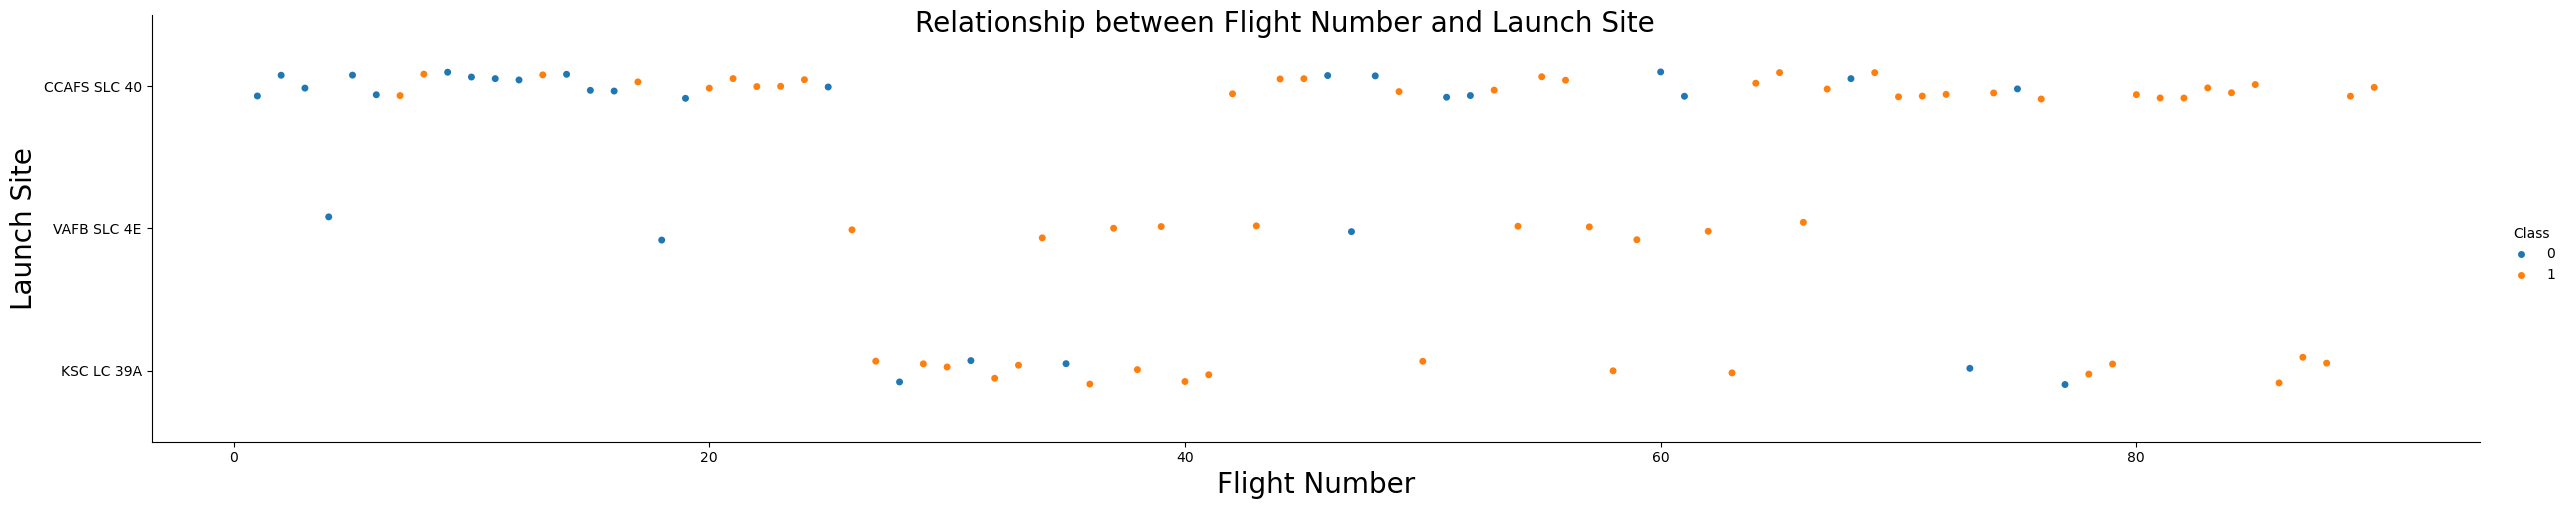

In [18]:
# Visualizing the relationship between FlightNumber and LaunchSite
plot = sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=5)
plot.set_axis_labels("Flight Number", "Launch Site", fontsize=20)
plot.fig.suptitle("Relationship between Flight Number and Launch Site", fontsize=20)

# Save the plot as a PNG file
plot.savefig("FlightNumber_vs_LaunchSite.png", dpi=300)  # dpi=300 ensures high-definition quality
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


<Figure size 1200x600 with 0 Axes>

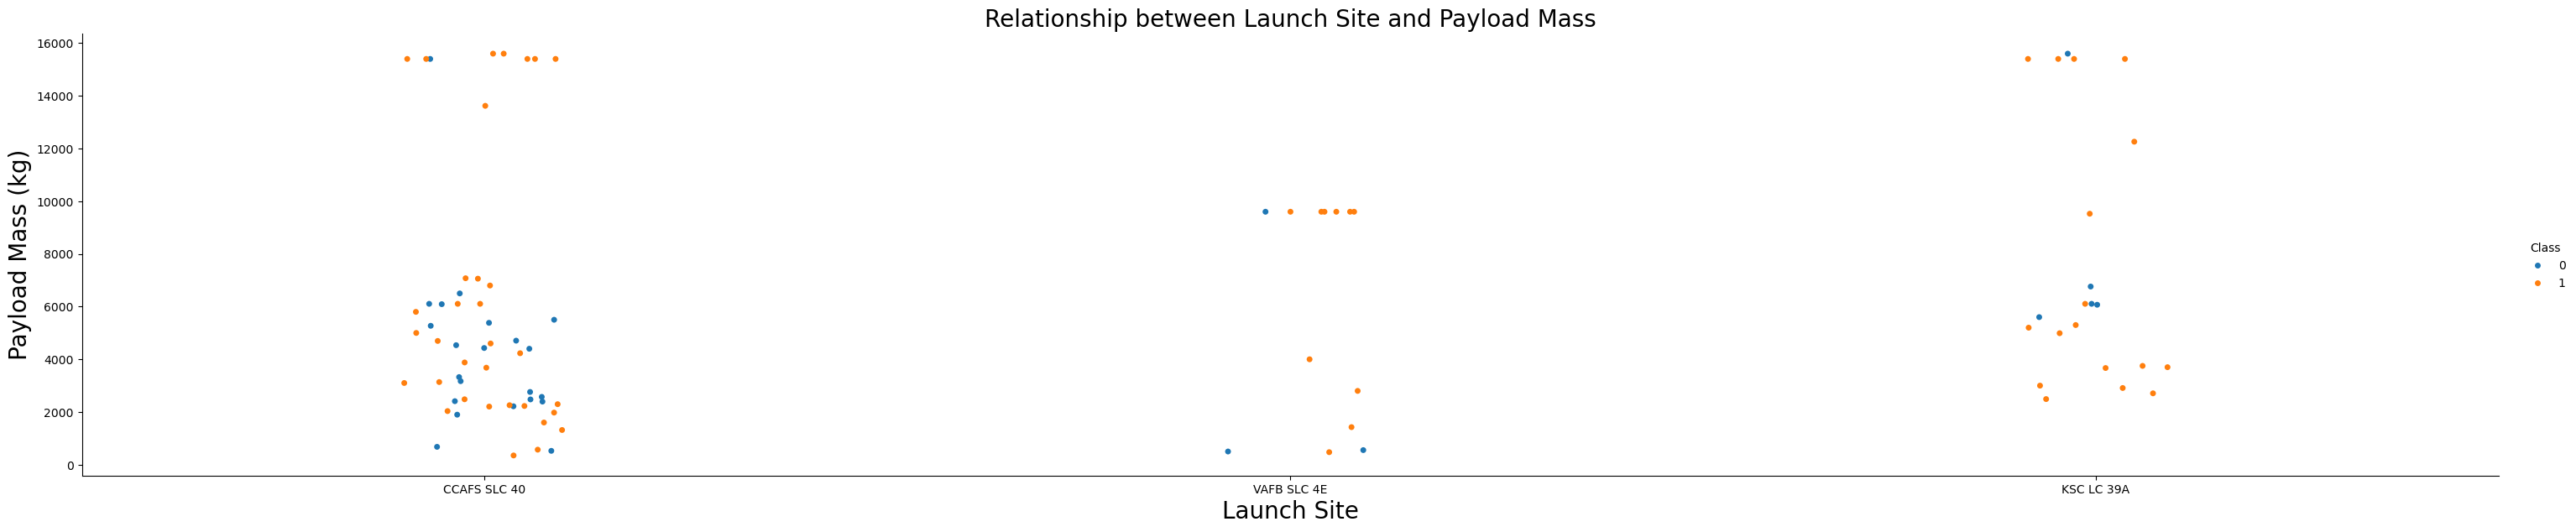

Larger payloads are launched more frequently from KSC LC 39A.
Success rates appear higher for medium payloads at KSC LC 39A.


In [22]:
# Completed Code to Analyze and Save the Plot
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the relationship between Payload Mass and Launch Site
plt.figure(figsize=(12, 6))
plot = sns.catplot(x="LaunchSite", y="PayloadMass", hue="Class", data=df, aspect=5, height=6)
plt.xlabel("Launch Site", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.title("Relationship between Launch Site and Payload Mass", fontsize=20)
plt.savefig("PayloadMass_vs_LaunchSite.png", dpi=300)  # Save the plot as an HD PNG file
plt.show()

# Analyzing the data to generate insights
# Grouping payload mass data by LaunchSite
payload_analysis = df.groupby("LaunchSite")["PayloadMass"].mean().reset_index()
success_rate_analysis = df.groupby("LaunchSite")["Class"].mean().reset_index()

# Finding sites with the highest average payload and highest success rates for medium payloads
largest_payload_site = payload_analysis.loc[payload_analysis["PayloadMass"].idxmax(), "LaunchSite"]
medium_payload_success_site = success_rate_analysis.loc[success_rate_analysis["Class"].idxmax(), "LaunchSite"]

# Printing the insights
print(f"Larger payloads are launched more frequently from {largest_payload_site}.")
print(f"Success rates appear higher for medium payloads at {medium_payload_success_site}.")


<Figure size 1400x800 with 0 Axes>

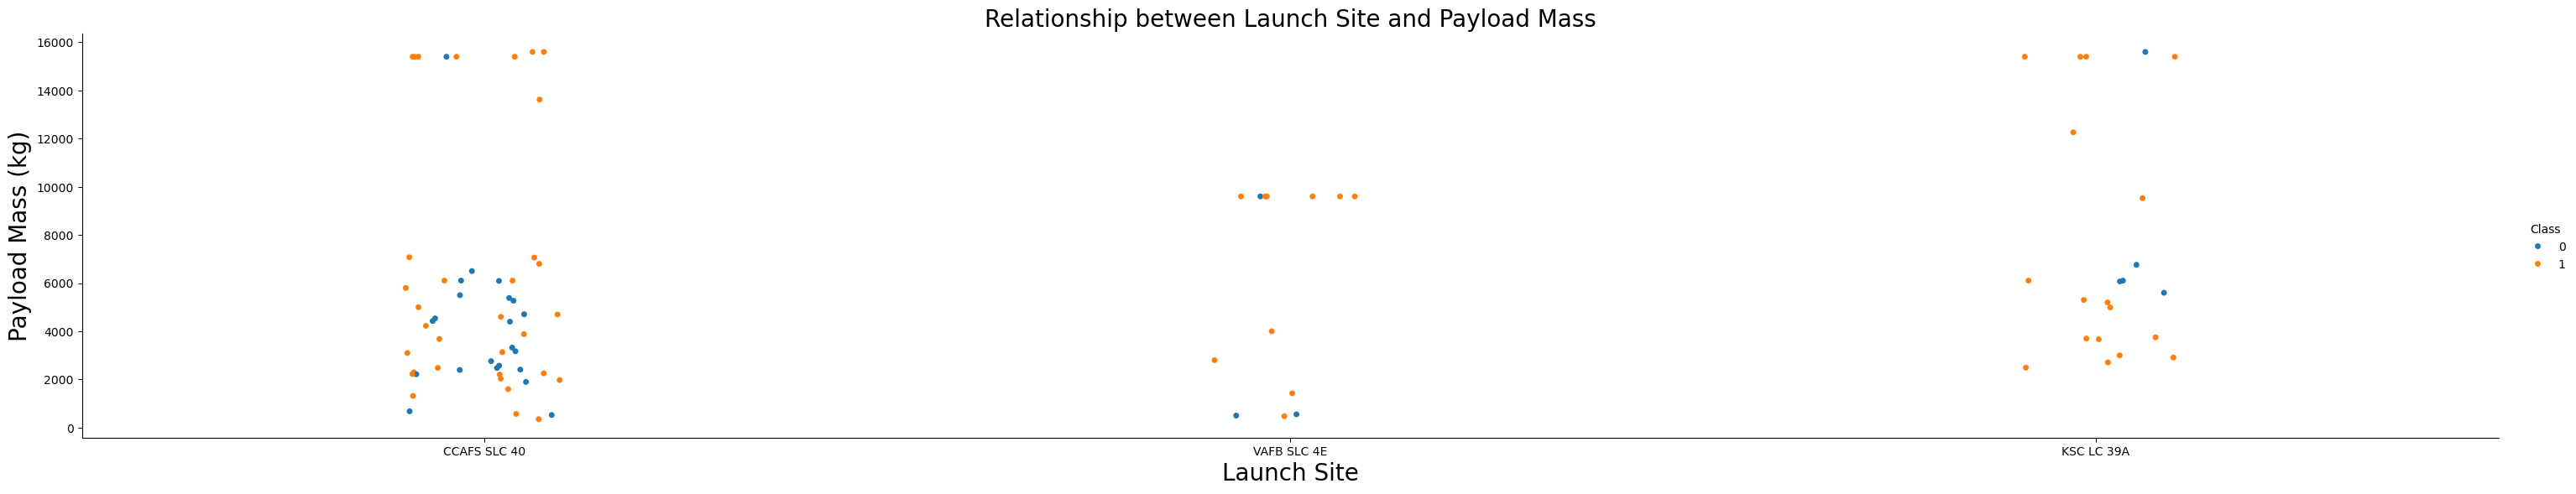

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the relationship between Payload Mass and Launch Site
plt.figure(figsize=(14, 8))  # Increased the figure size for better layout
plot = sns.catplot(x="LaunchSite", y="PayloadMass", hue="Class", data=df, aspect=5, height=6)
plot.fig.subplots_adjust(top=0.9)  # Adjust the top to make room for the title
plt.xlabel("Launch Site", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.title("Relationship between Launch Site and Payload Mass", fontsize=20)
plot.fig.savefig("PayloadMass_vs_LaunchSite.png", dpi=300, bbox_inches="tight")  # Save with adjusted frame
plt.show()


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


C:\Users\allco\AppData\Local\Temp\ipykernel_14720\992275098.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Orbit", y="Class", data=success_rate, palette="viridis")


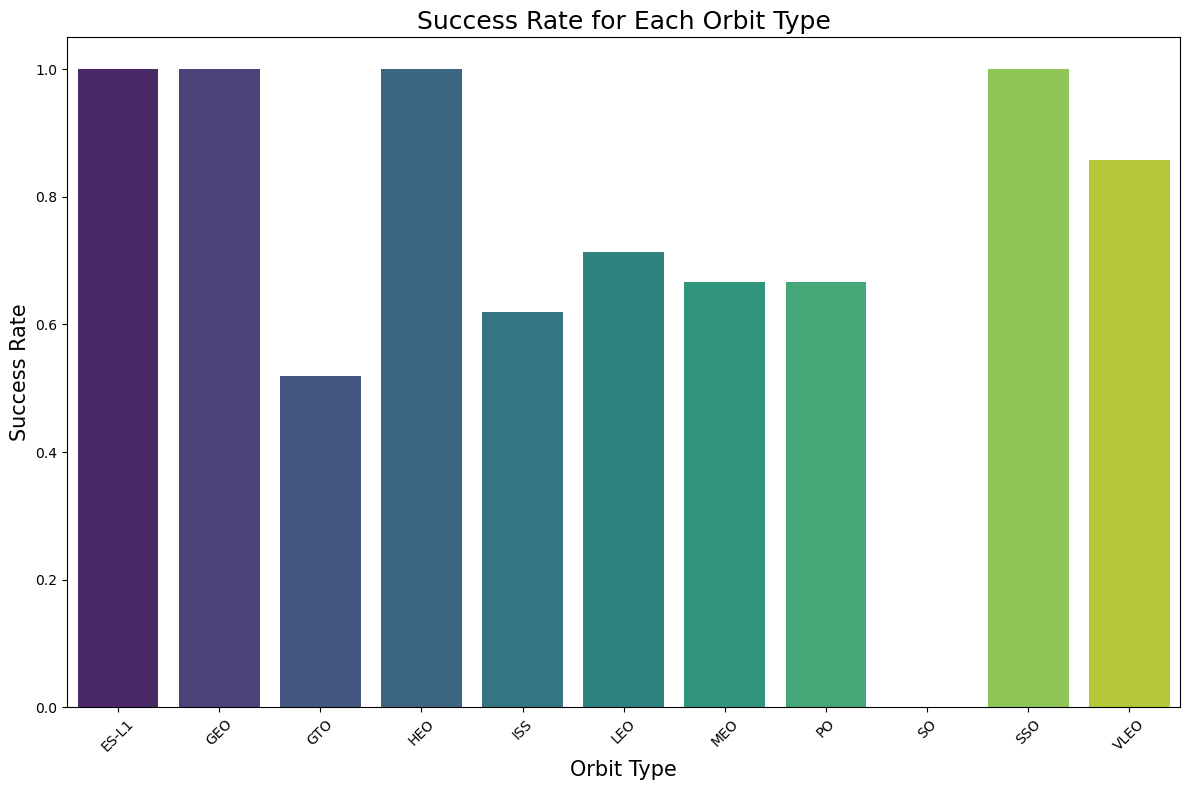

ES-L1 has the highest success rate (1.00).
Lower success rates are observed for SO (0.00).


In [24]:
# Calculate the success rate for each orbit type
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Determine the highest and lowest success rate
highest_success_orbit = success_rate.loc[success_rate['Class'].idxmax(), 'Orbit']
highest_success_rate = success_rate['Class'].max()
lowest_success_orbit = success_rate.loc[success_rate['Class'].idxmin(), 'Orbit']
lowest_success_rate = success_rate['Class'].min()

# Create a bar chart for the success rate of each orbit
plt.figure(figsize=(12, 8))
sns.barplot(x="Orbit", y="Class", data=success_rate, palette="viridis")
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate for Each Orbit Type", fontsize=18)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an HD PNG
plt.savefig("SuccessRate_by_Orbit.png", dpi=300)

# Display the plot
plt.show()

# Print the insights
print(f"{highest_success_orbit} has the highest success rate ({highest_success_rate:.2f}).")
print(f"Lower success rates are observed for {lowest_success_orbit} ({lowest_success_rate:.2f}).")


Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


<Figure size 1200x800 with 0 Axes>

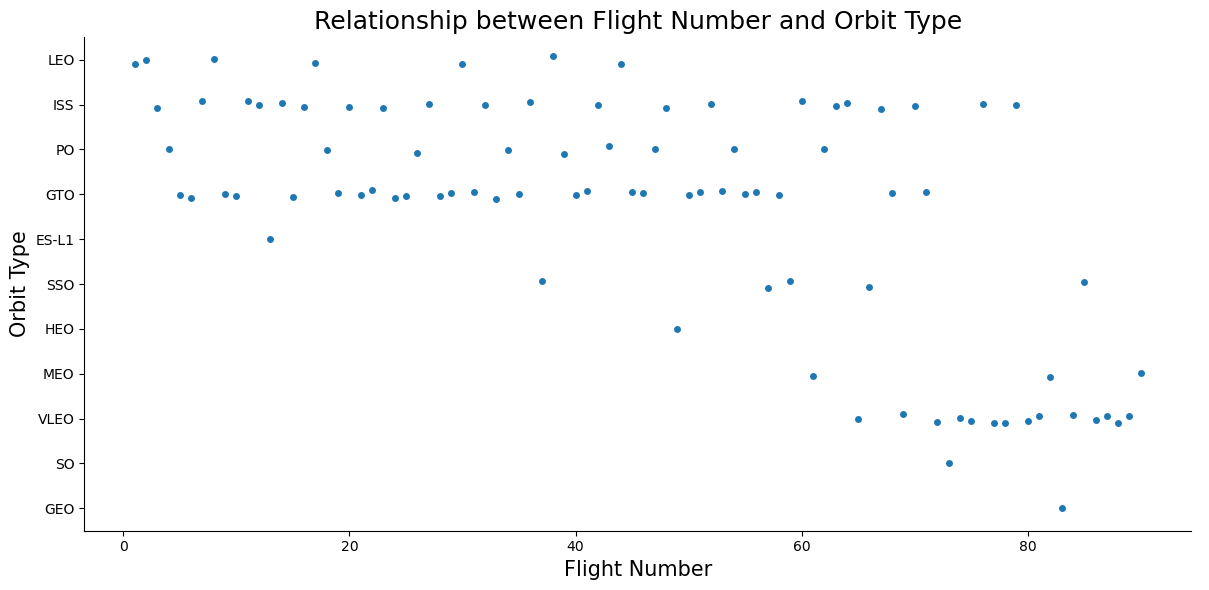

Certain orbits are preferred for early missions (low flight numbers): GTO.
Patterns may emerge indicating the complexity of specific orbits. For example, GEO appears more frequently in later missions.


In [27]:
# Visualizing the relationship between FlightNumber and Orbit type
plt.figure(figsize=(12, 8))
sns.catplot(x="FlightNumber", y="Orbit", data=df, kind="strip", jitter=True, aspect=2, height=6)

# Adding labels and title
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Relationship between Flight Number and Orbit Type", fontsize=18)

# Adjust layout and save the plot as HD PNG
plt.tight_layout()
plt.savefig("FlightNumber_vs_Orbit_HD.png", dpi=300)

# Display the plot
plt.show()

# Insights based on the visual analysis
# Extracting flight numbers and orbit types
early_missions = df[df['FlightNumber'] <= 10]
preferred_orbits_early = early_missions['Orbit'].value_counts()

# Determine if certain orbits are preferred for early missions (low flight numbers)
preferred_orbits = preferred_orbits_early.idxmax()
print(f"Certain orbits are preferred for early missions (low flight numbers): {preferred_orbits}.")

# Analyzing if patterns emerge indicating the complexity of specific orbits
orbit_complexity = df.groupby('Orbit')['FlightNumber'].mean().reset_index()
complex_orbit = orbit_complexity.loc[orbit_complexity['FlightNumber'].idxmax(), 'Orbit']
print(f"Patterns may emerge indicating the complexity of specific orbits. For example, {complex_orbit} appears more frequently in later missions.")


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


C:\Users\allco\AppData\Local\Temp\ipykernel_14720\4266416909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Orbit", y="PayloadMass", data=df, palette="Set2")


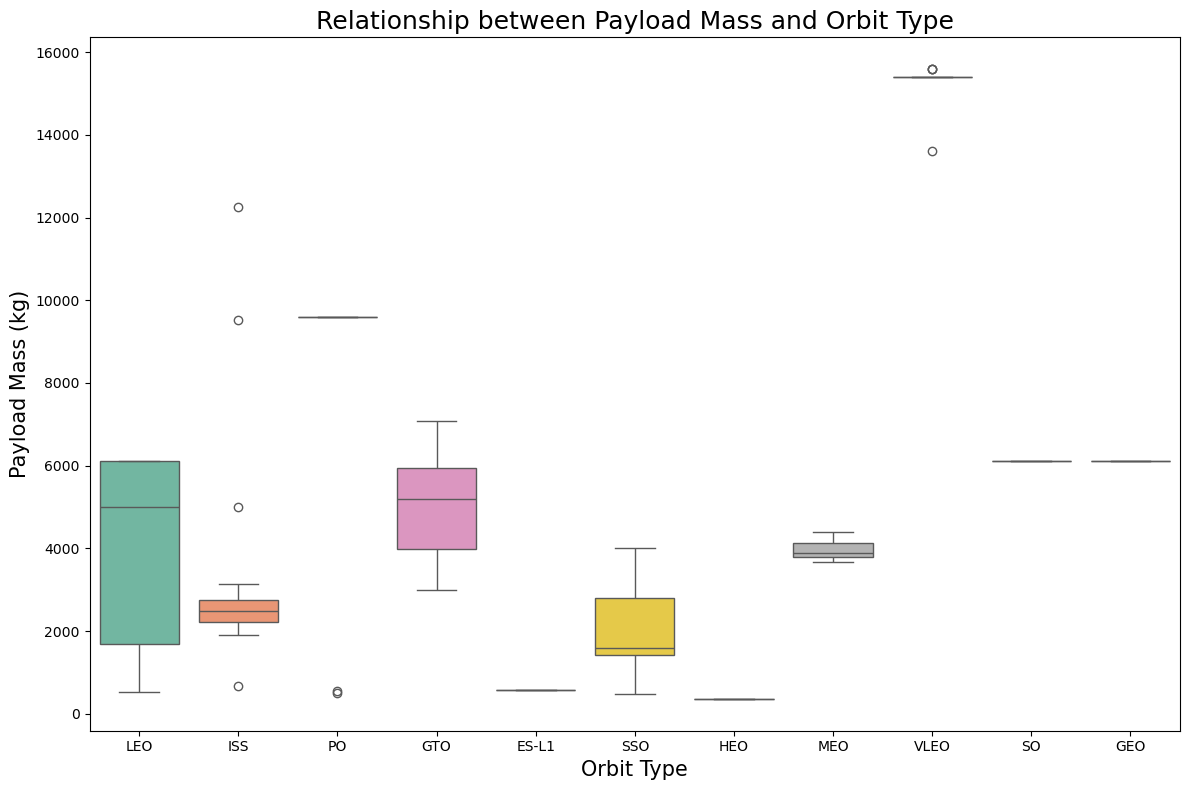

VLEO supports the largest payloads.
Narrower ranges in ES-L1 suggest standardized payload sizes.


In [28]:
# Visualizing the relationship between PayloadMass and Orbit type
plt.figure(figsize=(12, 8))
sns.boxplot(x="Orbit", y="PayloadMass", data=df, palette="Set2")

# Adding labels and title
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Payload Mass (kg)", fontsize=15)
plt.title("Relationship between Payload Mass and Orbit Type", fontsize=18)

# Adjust layout and save the plot as HD PNG
plt.tight_layout()
plt.savefig("PayloadMass_vs_Orbit_HD.png", dpi=300)

# Display the plot
plt.show()

# Insights based on the visual analysis
# Identifying the orbit with the largest payloads
max_payload_orbit = df.groupby('Orbit')['PayloadMass'].max().idxmax()
print(f"{max_payload_orbit} supports the largest payloads.")

# Analyzing the range of payload sizes for each orbit
payload_range = df.groupby('Orbit')['PayloadMass'].agg(['min', 'max']).reset_index()
narrowest_range_orbit = payload_range.loc[(payload_range['max'] - payload_range['min']).idxmin(), 'Orbit']
print(f"Narrower ranges in {narrowest_range_orbit} suggest standardized payload sizes.")


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [10]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

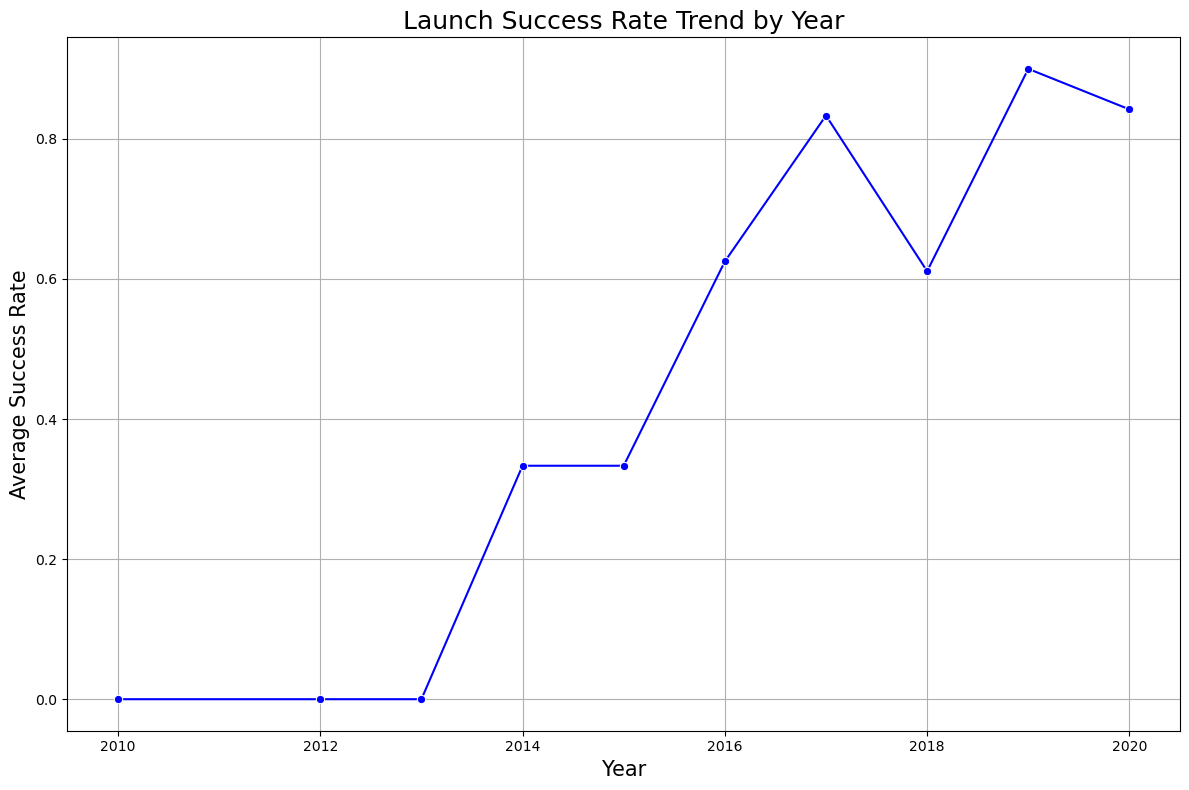

VLEO supports the largest payloads.
Narrower ranges in ES-L1 suggest standardized payload sizes.


In [29]:
# Assuming df is your DataFrame and it contains the 'Date' and 'Class' columns

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

# Group by Year and calculate the average success rate (Class column is used for success/failure)
yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

# Plotting the success rate trend
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Class', data=yearly_success_rate, marker='o', color='blue')

# Adding labels and title
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Success Rate", fontsize=15)
plt.title("Launch Success Rate Trend by Year", fontsize=18)

# Enable grid for better visualization
plt.grid(True)

# Adjust layout and save the plot as HD PNG
plt.tight_layout()
plt.savefig("Launch_Success_Rate_Trend_by_Year_HD.png", dpi=300)

# Display the plot
plt.show()

# Insights based on the visual analysis:
# Identifying the orbit with the largest payloads
max_payload_orbit = df.groupby('Orbit')['PayloadMass'].max().idxmax()
print(f"{max_payload_orbit} supports the largest payloads.")

# Analyzing the range of payload sizes for each orbit
payload_range = df.groupby('Orbit')['PayloadMass'].agg(['min', 'max']).reset_index()
narrowest_range_orbit = payload_range.loc[(payload_range['max'] - payload_range['min']).idxmin(), 'Orbit']
print(f"Narrower ranges in {narrowest_range_orbit} suggest standardized payload sizes.")


You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [12]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [13]:
# Select the relevant columns from your dataframe
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# List of categorical columns to encode
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Apply one-hot encoding to the categorical columns
features_one_hot = pd.get_dummies(features, columns=categorical_columns)

# Display the resulting dataframe with encoded columns
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [14]:
# Cast all numeric columns to float64
features_one_hot = features_one_hot.astype('float64')

# Display the data types to verify the change
features_one_hot.dtypes


FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [15]:
# Export the features_one_hot dataframe to a CSV file
features_one_hot.to_csv('dataset_part_3.csv', index=False)


In [31]:
# Check the number of unique categories in each column
print("Unique categories in Orbit:", df['Orbit'].nunique())
print("Unique categories in LaunchSite:", df['LaunchSite'].nunique())
launch_sites = df['LaunchSite'].unique()
print("Unique Launch Sites:", launch_sites)
print("Unique categories in LandingPad:", df['LandingPad'].nunique())
print("Unique categories in Serial:", df['Serial'].nunique())

# Check the number of columns in the features_one_hot dataframe
features_one_hot.columns


Unique categories in Orbit: 11
Unique categories in LaunchSite: 3
Unique Launch Sites: ['CCAFS SLC 40' 'VAFB SLC 4E' 'KSC LC 39A']
Unique categories in LandingPad: 5
Unique categories in Serial: 53


Index(['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs',
       'Block', 'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO',
       'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO',
       'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40',
       'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E',
       'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial

In [17]:
features_one_hot.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs',
       'Block', 'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO',
       'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO',
       'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40',
       'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E',
       'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial

In [32]:
cca_sites = df[df['LaunchSite'].str.startswith('CCA')]
print(cca_sites[['LaunchSite']].head(5))


     LaunchSite
0  CCAFS SLC 40
1  CCAFS SLC 40
2  CCAFS SLC 40
4  CCAFS SLC 40
5  CCAFS SLC 40


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
